* keras를 활용한 심층 신경망 실습

1. MNIST 손글씨 숫자 분류

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.16.1'

* 순차 심층 신경망 모델 구현
1. 6만개의 이미지로 이루어진 X_train을 심층 신경망 모델에 넣어서 y_train 데이터의 숫자로 인식하도록 학습
2. 노드의 활성화 함수, 학습을 위한 최적화 함수, 손실함수, 측정 방법 설정
3. 학습을 마친 모델에 1만개의 이미지로 이루어진 X_test를 입력하여 정확도 측정

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(28, 28)


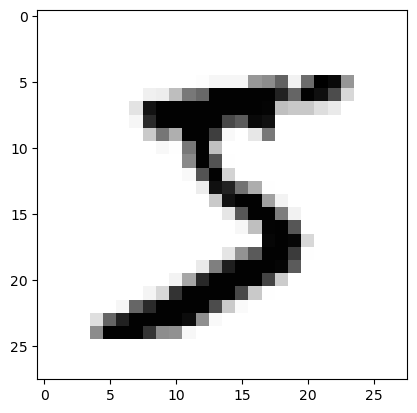

In [6]:
# 데이터 전처리 및 분리 및 시각화
from tensorflow import keras
from keras.datasets import mnist

mnist = mnist

(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

print(X_train_all.shape)
print(y_train_all.shape)
print(X_test.shape)
print(X_train_all[0].shape)

import matplotlib.pyplot as plt

plt.imshow(X_train_all[0], cmap='Greys', interpolation='nearest')

In [8]:
X0 = X_train_all[46]
for r in range(0, 28):
    for c in range(0, 28):
        print(f"{X0[r, c]:4}", end='')
    print()

# import numpy as np
# np.set_printoptions(linewidth=np.inf)
# print(X_train_all[0]) # 제일 윗 장을 들고왔다

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   2 152 203 181 141  58  17   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  40 172 247 188 232 234  35   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  17  82 101 143 252 245  67  35 225 214   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   5 132 237 254 254 254 254 254 243  80 210 248  35   0   0   0

In [9]:
# 앞에서부터 10장의 숫자는?
y_train_all[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# 타겟 분포 확인 # value_counts -> pd.Series에 있음
import pandas as pd

pd.Series(y_train_all).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

In [11]:
X_train_all[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

* 데이터 준비: 분할, 차원변경, 정규화

In [12]:
# 심층 신경망 구성을 위한 데이터 준비
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all,
                                                  test_size=0.2, random_state=42)

# import numpy as np
# 심층 신경망이므로 훈련 세트와 검증 세트 샘플 데이터의 차원을 2차원에서 1차원 배열로 전환

print(X_train.shape, X_val.shape)
print(X_train[0])

(48000, 28, 28) (12000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64 154
  103   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 196 254
  254   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 240 254
  254   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

In [13]:
# X_train = X_train.reshape(-1, 784)
# X_val = X_val.reshape(-1, 784)

# print(X_train.shape, X_val.shape)
# print(X_train[0])

In [14]:
# 데이터 정규화
# 이미지 데이터값은 0~255 -> 0~1 로 변환
X_train = X_train / 255
X_val = X_val / 255

In [15]:
# y_train을 카테고리화

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

y_train_encoded[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

* 인공 신경망 모델 구성

In [16]:
# 모델 구조
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # 위에서 reshape 했으면 할 필요 없고 밑에 input_shape 해주어야 함
model.add(Dense(units=20, activation='sigmoid'))  # input_shape=(784, ),
model.add(Dense(units=15, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

c:\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# 인공 신경망 요약
model.summary()

# param 계산
# 784 * 20 + 20
# 20 * 15 + 15
# 15 * 10 + 10

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,175 (63.18 KB)

 Trainable params: 16,175 (63.18 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
# # 모델 구조 시각화
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_shapes=True, show_layer_names = True)

* 최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [24]:
# 학습을 위한 최적화 함수, 손실 함수 등을 설정하여 모델 컴파일
# y label을 원핫 인코딩하지 않은 경우에는 loss='sparse_categorical_crossentropy'만 사용 가능
# y label을 원핫 인코딩한 경우에는 'categorical_crossentropy'만 사용가능

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
# 모델 훈련
# 순차 신경망 학습
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data = (X_val, y_val_encoded))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5536 - loss: 1.6815 - val_accuracy: 0.8731 - val_loss: 0.5714
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8843 - loss: 0.4851 - val_accuracy: 0.9058 - val_loss: 0.3496
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9146 - loss: 0.3195 - val_accuracy: 0.9194 - val_loss: 0.2852
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9288 - loss: 0.2556 - val_accuracy: 0.9262 - val_loss: 0.2565
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9350 - loss: 0.2310 - val_accuracy: 0.9337 - val_loss: 0.2305
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9427 - loss: 0.2053 - val_accuracy: 0.9373 - val_loss: 0.2165
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9475 - loss: 0.1882 - val_accuracy: 0.9377 - val_loss: 0.2109
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9510 - loss: 0.1732 

In [27]:
# 손실과 정확도 그래프 : 모델 성능 평가
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [28]:
df = pd.DataFrame(history.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.729563,1.184365,0.873083,0.571359
1,0.893896,0.428958,0.905833,0.349551
2,0.917271,0.305236,0.919417,0.285217
3,0.929146,0.253984,0.926167,0.256469
4,0.936458,0.225052,0.933667,0.230513
5,0.942354,0.204641,0.937333,0.216504
6,0.946437,0.188476,0.937750,0.210853
7,0.949708,0.175830,0.942750,0.199031
8,0.953021,0.165583,0.942000,0.198493
9,0.954375,0.157078,0.944500,0.191870


In [29]:
df.columns = ['train_loss', 'train_acc', 'val_loss', 'val_acc']
df

,train_loss,train_acc,val_loss,val_acc
0,0.729563,1.184365,0.873083,0.571359
1,0.893896,0.428958,0.905833,0.349551
2,0.917271,0.305236,0.919417,0.285217
3,0.929146,0.253984,0.926167,0.256469
4,0.936458,0.225052,0.933667,0.230513
5,0.942354,0.204641,0.937333,0.216504
6,0.946437,0.188476,0.937750,0.210853
7,0.949708,0.175830,0.942750,0.199031
8,0.953021,0.165583,0.942000,0.198493
9,0.954375,0.157078,0.944500,0.191870


* 모델 학습 결과 시각화

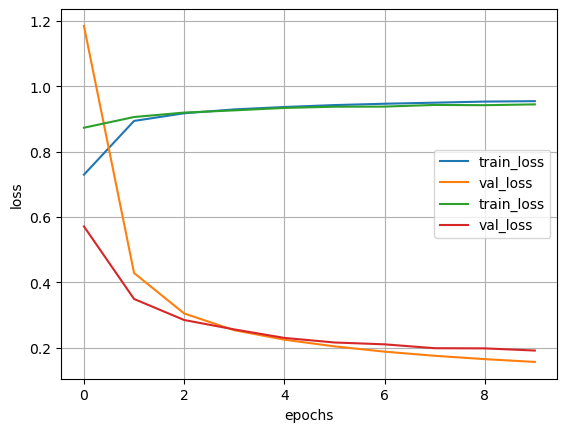

In [30]:
plt.plot(df['train_loss'], label='train_loss')
plt.plot(df['train_acc'], label='val_loss')
plt.plot(df['val_loss'], label='train_loss')
plt.plot(df['val_acc'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

In [31]:
len(X_test[0])

28

In [32]:
# 모델 평가
# 테스트 데이터셋 변환
X_test = X_test.reshape(-1, 28, 28)
y_test_encoded = to_categorical(y_test)
eval_loss, eval_acc = model.evaluate(X_test, y_test_encoded)
# print(f"손실값 : {eval_loss}, \n 정확도 : {eval_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9109 - loss: 0.3000


In [33]:
y_pred_encoded = model.predict(X_test)

import numpy as np
np.set_printoptions(suppress=True)
y_pred_encoded[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.00000014, 0.00044774, 0.00073443, 0.00240821, 0.00001027,
        0.00001039, 0.00000002, 0.99558145, 0.0000253 , 0.00078207],
       [0.00022651, 0.0005196 , 0.9969555 , 0.00042549, 0.00003849,
        0.00020544, 0.0010378 , 0.00037954, 0.00021027, 0.00000138],
       [0.00001031, 0.9993687 , 0.00008109, 0.00007057, 0.00000002,
        0.00001667, 0.00005018, 0.00023105, 0.00006154, 0.00010989],
       [0.99840814, 0.00001326, 0.00040358, 0.0001302 , 0.00000364,
        0.0005254 , 0.00034518, 0.00000046, 0.00008896, 0.00008124],
       [0.00020368, 0.00000016, 0.00569147, 0.00024276, 0.98369455,
        0.00041839, 0.00027849, 0.00018543, 0.00099897, 0.00828603]],
      dtype=float32)

In [34]:
y_pred_class = np.argmax(model.predict(X_test), axis = -1)
print(y_pred_class)
print(len(y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7 2 1 ... 4 5 6]
10000


In [35]:
# 모델 검증 및 평가

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(y_test)
print(y_pred_class)
print(confusion_matrix(y_test, y_pred_class))
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[[ 941    1    9    3    2    7    7    3    4    3]
 [   0 1103    5    5    0    1    4    4   12    1]
 [  10    7  948   18    9    1    8    9   20    2]
 [   7    5   22  926    2    8    2    8   25    5]
 [   4    0    9    2  888    0   21    5    8   45]
 [  19    5    6   37    6  771   18    6   17    7]
 [  18    1   11    0    7   11  904    0    4    2]
 [   2   15   22   22    2    1    1  919    2   42]
 [  15   12   14   20    7   11    7    4  879    5]
 [   6    2    0   12   25    5    1   14   14  930]]
0.9209
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.96      0.97      0.97      1135
           2       0.91      0.92      0.91      1032
           3       0.89      0.92      0.90      1010
           4       0.94      0.90      0.92       982
           5       0.94      0.86      0.90       892
           6       0.93      0.94      0.94    

9209


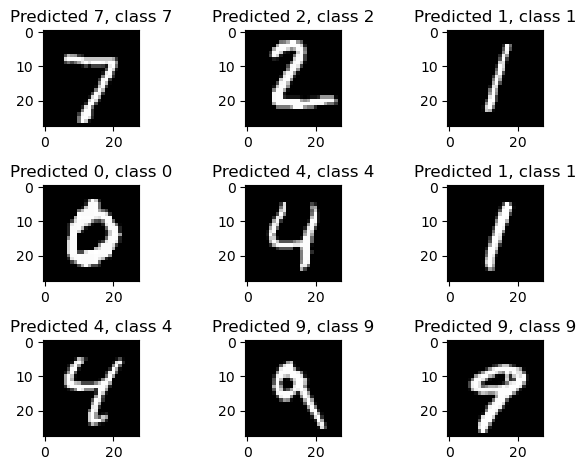

In [36]:
# 모델 학습 결과 시각화

# 정답을 맞춘 경우
y_test_class = y_test
correct_indices = np.nonzero(y_pred_class == y_test_class)[0]
print(len(correct_indices))  # 정답을 맞춘 개수

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title('Predicted {}, class {}'.format(y_pred_class[correct], y_test_class[correct]))

plt.tight_layout()  # for 문을 빠져나와서 화면에 그림을 보여주기 위해 tight_layout 함수를 사용한다

791


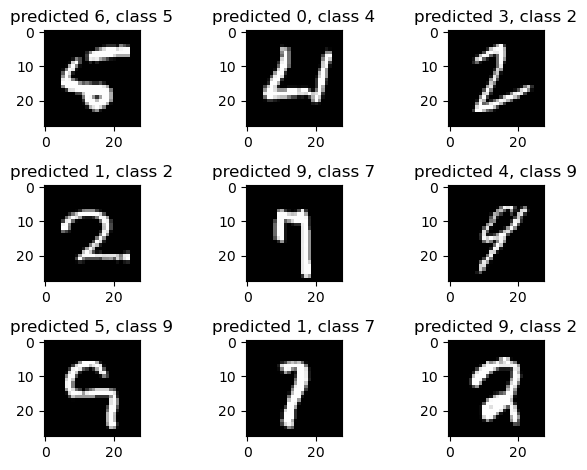

In [38]:
# 정답을 맞추지 못한 경우
incorrect_indeices = np.nonzero(y_pred_class != y_test_class)[0]
print(len(incorrect_indeices))

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    incorrect = incorrect_indeices[i]
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"predicted {y_pred_class[incorrect]}, class {y_test_class[incorrect]}")

plt.tight_layout()

---

* 2. Fashion MNIST 의류 이미지 다중 분류

In [40]:
# 데이터 탐색
from keras.datasets import fashion_mnist

mnist = fashion_mnist

In [41]:
# 데이터셋 준비
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [42]:
# 데이터셋 크기 확인
print(X_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


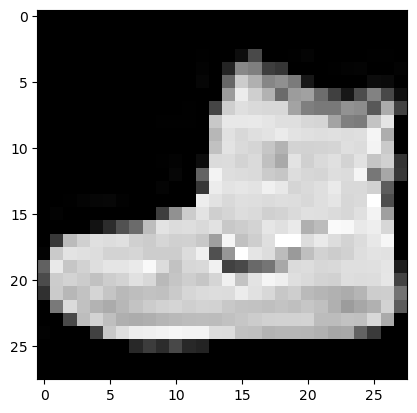

In [44]:
# 샘플 이미지 확인
# cmap의 기본값 'viridis' 짙은 녹색 ~ 밝은 노란색, cmap=gray, 0에 가까울수록 어둡다
import matplotlib.pyplot as plt

plt.imshow(X_train_all[0], cmap='gray')
plt.show()

In [45]:
# 클래스(타겟)의 내용과 의미 확인하기
print(y_train_all[0])

9


In [46]:
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']
print(class_names[y_train_all[0]])

앵클부츠


In [47]:
# 타겟 분포 확인하기 : numpy.bincount() - 배열에 있는 정수값의 빈도를 세고, 정수에 해당하는 인덱스 위치에 저장함
import numpy as np
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

* 데이터 준비 : 분할, 정규화, 차원 변경

In [48]:
# 데이터 분할 (stratify = True)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify = y_train_all,
                                                  test_size = 0.2, random_state=42)

print(X_train.shape)

(48000, 28, 28)


In [49]:
# 심층 신경망이므로 훈련 세트와 검증 세트의 샘플 데이터를 2차원 배열에서 1차원 배열로 전환
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)

X_train[0].shape

(784,)

In [50]:
print(np.bincount(y_train));print(np.bincount(y_test))

[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [51]:
# 입력 데이터 범위 전환
# 이미지 데이터값은 0 ~ 255 -> 0 ~ 1로 변환
X_train = X_train / 255
X_val = X_val / 255

In [52]:
# 타겟 데이터 원핫 인코딩
# 다중 분류이므로 예측 데이터가 10개가 나오므로 예측 데이터와 타겟을 비교하기 위해

y_train_encoded = to_categorical(y_train, num_classes=10)
y_val_encoded = to_categorical(y_val, num_classes=10)

print(y_train_encoded.shape, y_val_encoded.shape)
print(y_train[0], y_train_encoded[0])
y_train_encoded[:10]

(48000, 10) (12000, 10)
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

* 인공신경망 모형 구성

In [53]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# input_shape : 텐서의 모양
model.add(Dense(units=100,  input_shape=(784, ), kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

c:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* 최적화 알고리즘과 손실함수 지정 : 모형의 학습과정 설정

In [54]:
# 최적의 알고리즘과 손실함수 지정 : 모형의 학습 과정 설정
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])
# metrics : 훈련 과정 기록으로 history 객체에 정확도를 남김

In [55]:
# 설정된 모형에 대해 상태 확인
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# 모델 훈련
X_train.shape, y_train_encoded.shape, X_val.shape, y_val_encoded.shape

# 모델 학습 (batch_size default = 32, 48000/32 = 1500)
history = model.fit(X_train, y_train_encoded, epochs=40, validation_data=(X_val, y_val_encoded))

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5391 - loss: 1.7321 - val_accuracy: 0.7371 - val_loss: 0.9570
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7413 - loss: 0.8894 - val_accuracy: 0.7608 - val_loss: 0.7453
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7623 - loss: 0.7246 - val_accuracy: 0.7793 - val_loss: 0.6593
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7776 - loss: 0.6549 - val_accuracy: 0.7928 - val_loss: 0.6078
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7888 - loss: 0.6101 - val_accuracy: 0.8026 - val_loss: 0.5732
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8006 - loss: 0.5807 - val_accuracy: 0.8098 - val_loss: 0.5486
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8074 - loss: 0.5585 - val_accuracy: 0.8175 - val_loss: 0.5291
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8142 - loss: 0.5384 - 

In [57]:
# 손실과 정확도 그래프 : 모델 성능 평가

df = pd.DataFrame(history.history)
df.columns = ['train_loss', 'train_acc', 'val_loss', 'val_acc']
df

,train_loss,train_acc,val_loss,val_acc
0,0.657083,1.377819,0.737083,0.956977
1,0.747417,0.837812,0.760833,0.745344
2,0.766437,0.705727,0.779250,0.659288
3,0.781563,0.641615,0.792833,0.607785
4,0.794062,0.600814,0.802583,0.573228
5,0.804250,0.571438,0.809833,0.548551
6,0.811083,0.549198,0.817500,0.529108
7,0.816458,0.531701,0.822333,0.511908
8,0.821563,0.517162,0.826167,0.499507
9,0.824479,0.505447,0.830667,0.488316


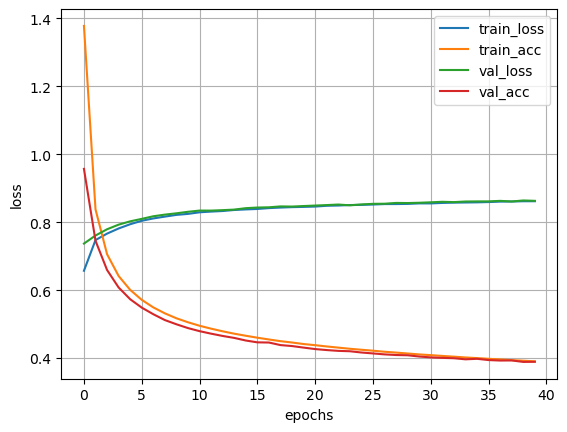

In [58]:
plt.plot(df['train_loss'], label='train_loss')
plt.plot(df['train_acc'], label='train_acc')
plt.plot(df['val_loss'], label='val_loss')
plt.plot(df['val_acc'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();plt.grid();plt.show()

In [59]:
# 검증 세트 정확도 계산하기 : evaluate() - 손실값과 metrics 매개변수에 추가한 측정 지표를 계산
loss, accuracy = model.evaluate(X_val, y_val_encoded, verbose=0)
print(loss, accuracy)

0.389076828956604 0.8629166483879089


In [60]:
# 테스트 세트 정확도 계산하기
from tensorflow.keras.utils import to_categorical

y_pred_proba = model.predict(X_test.reshape(-1, 784))
np.set_printoptions(suppress=True)
print(y_pred_proba[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[0.00000001 0.00000004 0.00000006 0.00000001 0.00000012 0.00000077
  0.00000006 0.0013565  0.00000328 0.99863917]
 [0.00005673 0.00000065 0.9525712  0.00001653 0.00177735 0.00000004
  0.04557547 0.00000001 0.00000169 0.00000042]
 [0.00000518 0.99998    0.00000076 0.0000027  0.00001108 0.
  0.00000001 0.00000024 0.00000003 0.        ]
 [0.00000004 0.99999404 0.00000005 0.0000048  0.00000069 0.
  0.         0.00000034 0.         0.        ]
 [0.01614988 0.00016663 0.809771   0.00068751 0.05420801 0.00000006
  0.11825825 0.00000014 0.00073753 0.00002102]]


In [61]:
y_pred = [np.argmax(x) for x in y_pred_proba]
y_pred[:5]

[9, 2, 1, 1, 2]

In [62]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [63]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.7809

In [64]:
y_test_encoded = to_categorical(y_test)
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 784), y_test_encoded, verbose=0)
print(test_loss, test_accuracy)

0.8924075961112976 0.7809000015258789


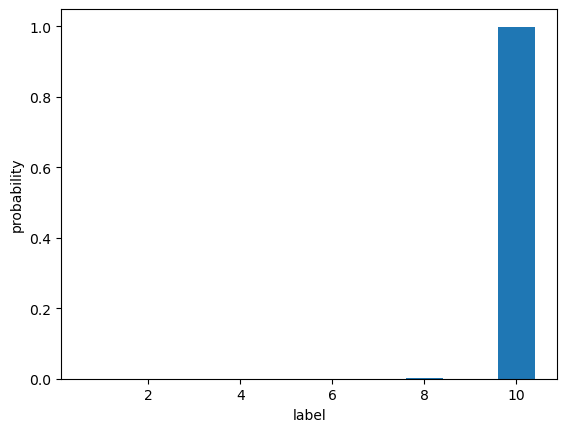

In [65]:
# 막대그래프로 레이블 확인
plt.bar(range(1, 11), y_pred_proba[0])
plt.xlabel('label')
plt.ylabel('probability')
plt.show()